In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
data = 'data/car_data_set/data.csv'

In [3]:
### 2.2.2 Reading and preparing data
df = pd.read_csv(data)
len(df)

11914

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
def normalize_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

def normalize_values(df):
    str_columns = list(df.dtypes[df.dtypes == 'object'].index)    
    for col in str_columns:
        df[col] = df[col].str.lower().str.replace(' ', '_')    
    return df

# normalize columns
df = ( 
    df
    .pipe(normalize_columns)
    .pipe(normalize_values)
)

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<AxesSubplot:xlabel='msrp', ylabel='Count'>

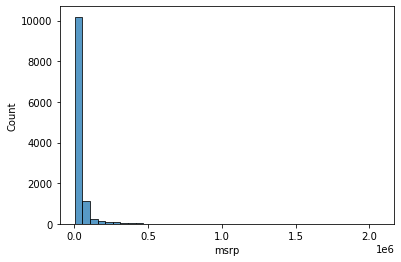

In [6]:
### 2.2.3 Target variable analysis
sns.histplot(df['msrp'], bins=40)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

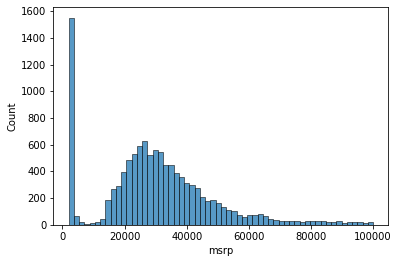

In [7]:
sns.histplot(df['msrp'][df['msrp'] < 100000])

<AxesSubplot:xlabel='msrp', ylabel='Count'>

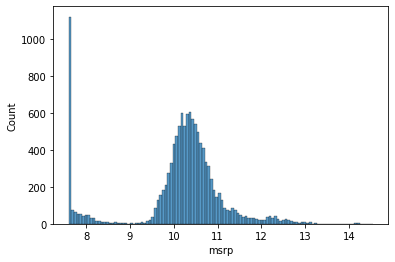

In [8]:
log_price = np.log1p(df['msrp'])
sns.histplot(log_price)

In [9]:
### 2.2.4 Checking for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [10]:
### 2.2.5 Validation framework
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Log transform
df_train['msrp_log1p'] = np.log1p(df_train['msrp'].values)
df_val['msrp_log1p'] = np.log1p(df_val['msrp'].values)
df_test['msrp_log1p'] = np.log1p(df_test['msrp'].values)

y_train = df_train['msrp_log1p']
y_val = df_val['msrp_log1p']
y_test = df_test['msrp_log1p']

# Remove target variables
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

df_train.head().T

,2735,6720,5878,11190,4554
make,chevrolet,toyota,subaru,volkswagen,ford
model,cobalt,matrix,impreza,vanagon,f-150
year,2008,2012,2016,1991,2017
engine_fuel_type,regular_unleaded,regular_unleaded,regular_unleaded,regular_unleaded,flex-fuel_(unleaded/e85)
engine_hp,148.0,132.0,148.0,90.0,385.0
engine_cylinders,4.0,4.0,4.0,4.0,8.0
transmission_type,manual,automatic,automatic,manual,automatic
driven_wheels,front_wheel_drive,front_wheel_drive,all_wheel_drive,rear_wheel_drive,four_wheel_drive
number_of_doors,2.0,4.0,4.0,3.0,4.0
market_category,NaN,hatchback,hatchback,NaN,flex_fuel


In [11]:
### 2.3 Machine learning for regression

def dot(xi, w):
    n = len(w)
    result = 0.0
    for j in range(n):
        result = resul + xi[j] * w[k]
    return result
    
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w)

In [12]:
def train_linear_regression(X, y):
    # add dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]



In [13]:
# 2.4 Predicting the price
base = ['engine_hp',
        'engine_cylinders',
        'highway_mpg',
        'city_mpg',
        'popularity']
df_num = df_train[base]


In [14]:
df_num = df_num.fillna(0)
X_train = df_num.values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [15]:
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

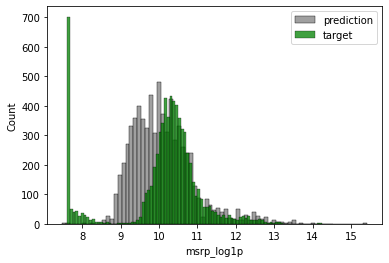

In [16]:
sns.histplot(y_pred, label='prediction', color='gray')
sns.histplot(y_train, label='target', color='g')
plt.legend()

In [17]:
### 2.4.2 RMSE: Evaluating model quality
def rmse(y, y_pred):
    error = y_pred - y
    
    mse = (error ** 2).mean()

    return np.sqrt(mse)

print(rmse(y_train, y_pred))

0.7554192603920132


In [18]:
y_train

2735      9.575747
6720      9.887663
5878      9.893235
11190     7.601402
4554     10.937757
           ...    
434      10.913287
1902     10.282472
9334     10.453803
5284     12.622481
2420     10.540620
Name: msrp_log1p, Length: 7150, dtype: float64

In [19]:
### 2.4.3 Validating the model
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301608

In [20]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.7616530991301608


In [21]:
### 2.4.4 Simple feature engineering
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X



In [22]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.5172055461058325


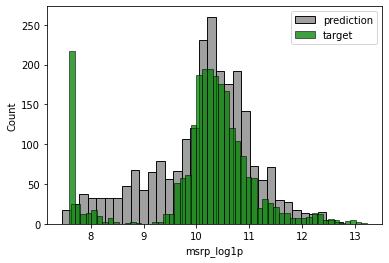

In [23]:
sns.histplot(y_pred, label='prediction', color='gray')
sns.histplot(y_val, label='target', color='g')
plt.legend()

In [24]:
### 2.4.5 Handling categorical variables

def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = f'num_doors_{v}'
        value = (df['number_of_doors'] == v).astype(int)
        df[feature] = value
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = f'is_make_{v}'
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    
    X = df_num.values
    return X

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))


validation: 0.5076038849556065


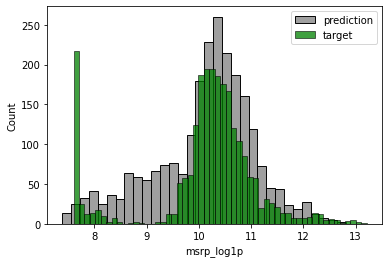

In [25]:
def plot_prediction(y_pred, y_val):
    sns.histplot(y_pred, label='prediction', color='gray')
    sns.histplot(y_val, label='target', color='g')
    plt.legend()

plot_prediction(y_pred, y_val)

In [26]:
df.groupby(['market_category']).size().reset_index()

,market_category,0
0,crossover,1110
1,"crossover,diesel",7
2,"crossover,exotic,luxury,high-performance",1
3,"crossover,exotic,luxury,performance",1
4,"crossover,factory_tuner,luxury,high-performance",26
...,...,...
66,"luxury,hybrid",52
67,"luxury,performance",673
68,"luxury,performance,hybrid",11
69,performance,601


validation: 512.3763474164435


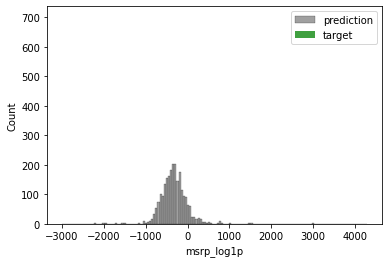

In [27]:
### 2.7 Handling more categorical variables in the prepare_X function

def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    # Doors
    for v in [2, 3, 4]:
        feature = f'num_doors_{v}'
        value = (df['number_of_doors'] == v).astype(int)
        df[feature] = value
        features.append(feature)

    # Makes
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = f'is_make_{v}'
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    
    # Fuel
    for v in ['diesel',
            'electric',
            # 'flex-fuel_(premium_unleaded_recommended/e85)',
            # 'flex-fuel_(premium_unleaded_required/e85)',
            'flex-fuel_(unleaded/e85)',
            # 'flex-fuel_(unleaded/natural_gas)',
            # 'natural_gas',
            'premium_unleaded_(recommended)',
            'premium_unleaded_(required)',
            'regular_unleaded'
             ]:
        feature = f'is_type_{v}'
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    # Driven wheels    
    for v in ['all_wheel_drive', 'four_wheel_drive', 'front_wheel_drive', 'rear_wheel_drive']:
        feature = f'is_driven_wheels_{v}'
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)
    
    # Market Category
    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = f'is_mc_{v}'
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)    

    # Size
    for v in ['compact', 'midsize', 'large']:
        feature = f'is_size_{v}'
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)    

    # Style
    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = f'is_style_{v}'
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)            
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    
    X = df_num.values
    return X

X_train = prepare_X(df_train)

w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

plot_prediction(y_pred, y_train)

In [48]:
### 2.8 Linear regression with regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print(f"{r=:5.2f} {w_0=:5.2f} {w[13]=:5.2f} {w[21]=:5.2f}")

r= 0.00 w_0=-7917999181542047.00 w[13]=18.37 w[21]=7917999181500621.00
r= 0.00 w_0= 6.89 w[13]=-0.13 w[21]= 1.68
r= 0.01 w_0= 6.88 w[13]=-0.13 w[21]= 1.67
r= 0.10 w_0= 6.78 w[13]=-0.13 w[21]= 1.65
r= 1.00 w_0= 6.14 w[13]=-0.13 w[21]= 1.49
r=10.00 w_0= 4.75 w[13]=-0.12 w[21]= 1.16


validation: 0.4607511868412045


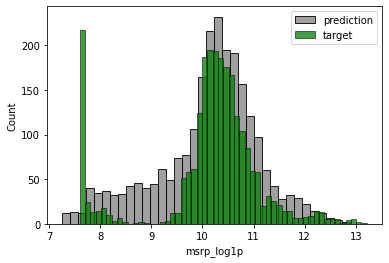

In [50]:
# Does regulation help?
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

plot_prediction(y_pred, y_val)

In [68]:
# Checking various r values
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for j in range(-6, 2):
    r = 10 ** j
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    print(f'{r:8.6f} => {rmse(y_val, y_pred):.8f}')

0.000001 => 0.46075122
0.000010 => 0.46075078
0.000100 => 0.46075080
0.001000 => 0.46075119
0.010000 => 0.46075513
0.100000 => 0.46079870
1.000000 => 0.46148092
10.000000 => 0.47422922


Validation r=0.01 => 0.46075513
Validation r=0.01 => 0.45923837


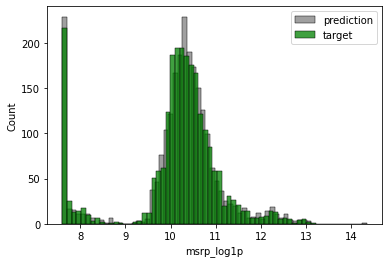

In [74]:
X_train = prepare_X(df_train)
r=0.01
w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print(f'Validation {r=} => {rmse(y_val, y_pred):.8f}')

X_val = prepare_X(df_test)
y_pred = w_0 + X_val.dot(w)
print(f'Validation {r=} => {rmse(y_test, y_pred):.8f}')

plot_prediction(y_test, y_val)

In [77]:
### 2.4.7 Using the model

ad = {
    'city_mpg': 18,
    'driven_wheels': 'all_wheel_drive',
    'engine_cylinders': 6.0,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 268.0,
    'highway_mpg': 25,
    'make': 'toyota',
    'market_category': 'crossover,performance',
    'model': 'venza',
    'number_of_doors': 4.0,
    'popularity': 2031,
    'transmission_type': 'automatic',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'year': 2013,
}

df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

y_pred = w_0 + X_test.dot(w)

suggestion = np.expm1(y_pred)
suggestion

array([29133.34435725])

In [76]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')